In [7]:
# problem 6

import numpy as np
import cvxpy as cp

K = 100 
t = np.linspace(0,20,num=K) 
dt = t[1] - t[0] 



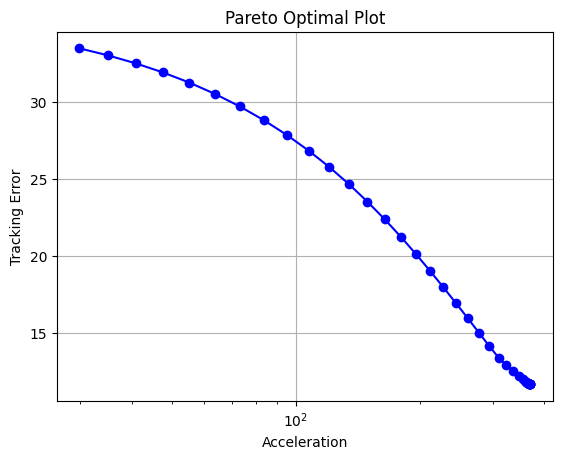

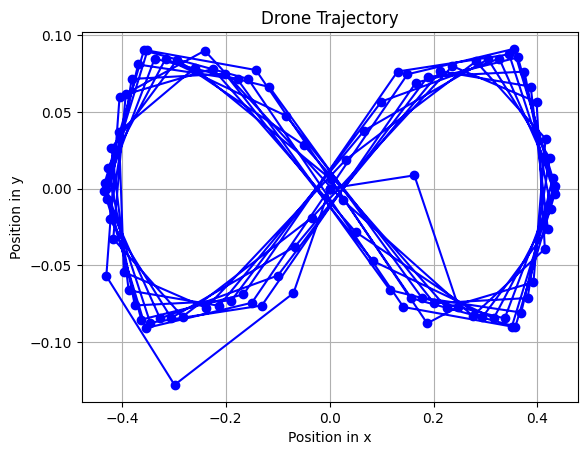

In [8]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

K = 100
t = np.linspace(0, 20, num=K)
dt = t[1] - t[0]

pref_x = 0.5 * np.sin(np.pi * t)
pref_y = 0.5 * np.sin(np.pi * t) * np.cos(np.pi * t)

pref = np.vstack([pref_x, pref_y])

lambda_values = np.logspace(-4, -1, 40)

tracking_errors = np.zeros(len(lambda_values))
accelerations = np.zeros(len(lambda_values))

for i, lmbda in enumerate(lambda_values):
    p = cp.Variable((2, K + 1))
    v = cp.Variable((2, K + 1))
    a = cp.Variable((2, K))

    objective = cp.Minimize(cp.sum_squares(p[:, :-1] - pref) + lmbda * cp.sum_squares(a))
    constraints = [
        p[:, 1:] == p[:, :-1] + dt * v[:, :-1],
        v[:, 1:] == v[:, :-1] + dt * a,
        cp.norm(a, 2, axis=0) <= 4,
        p[:, 0] == np.zeros(2),
        v[:, 0] == np.zeros(2),
        p[:, -1] == np.zeros(2),
        v[:, -1] == np.zeros(2)
    ]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    tracking_errors[i] = np.sum(np.linalg.norm(p.value[:, :-1] - pref, axis=0))
    accelerations[i] = np.sum(np.linalg.norm(a.value, axis=0))

# Pareto optimal plot
plt.plot(accelerations, tracking_errors, marker='o', linestyle='-', color='b')
plt.xlabel('Acceleration')
plt.ylabel('Tracking Error')
plt.title('Pareto Optimal Plot')
plt.xscale('log')
plt.grid(True)
plt.show()

# Select an appropriate value for lambda
selected_lambda = lambda_values[np.argmin(tracking_errors + lambda_values * accelerations)]

# generate plot for xy position for the selected lambda
p = cp.Variable((2, K + 1))
v = cp.Variable((2, K + 1))
a = cp.Variable((2, K))

objective = cp.Minimize(cp.sum_squares(p[:, :-1] - pref) + selected_lambda * cp.sum_squares(a))
constraints = [
    p[:, 1:] == p[:, :-1] + dt * v[:, :-1],
    v[:, 1:] == v[:, :-1] + dt * a,
    cp.norm(a, 2, axis=0) <= 4,
    p[:, 0] == np.zeros(2),
    v[:, 0] == np.zeros(2),
    p[:, -1] == np.zeros(2),
    v[:, -1] == np.zeros(2)
]

problem = cp.Problem(objective, constraints)
problem.solve()

# plot xy position for the selected lambda
plt.plot(p.value[0, :], p.value[1, :], marker='o', linestyle='-', color='b')
plt.xlabel('Position in x')
plt.ylabel('Position in y')
plt.title('Drone Trajectory')
plt.grid(True)
plt.show()
